In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = RandomForestClassifier(n_estimators)
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc]

In [6]:
result_df

,acc,sen,spc,prc
0,0.947368,0.957143,0.931818,0.957143
1,0.964912,0.972603,0.951220,0.972603
2,0.947368,0.971014,0.911111,0.943662
3,0.982456,1.000000,0.950000,0.973684
4,0.973684,0.969697,0.979167,0.984615
...,...,...,...,...
95,0.973684,0.987805,0.937500,0.975904
96,0.964912,0.956522,0.977778,0.985075
97,0.964912,0.971429,0.954545,0.971429
98,0.982456,0.975309,1.000000,1.000000


In [7]:
result_df.mean()

acc    0.960088
sen    0.975095
spc    0.934912
prc    0.961918
dtype: float64

In [8]:
result_df.std()

acc    0.018551
sen    0.019166
spc    0.039857
prc    0.023264
dtype: float64

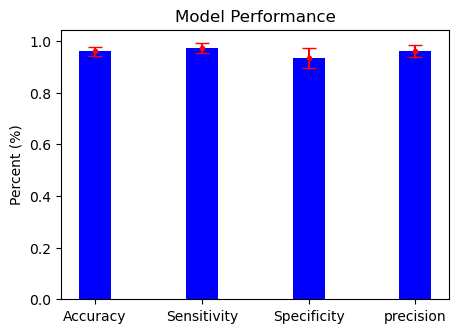

In [9]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()